## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv("BMW sales data (2010-2024).csv")

## First 5 rows of the dataset:

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


## **Dataset Overview**

## Shape of the dataset

In [4]:
df.shape

(50000, 11)

## Dataset info (data types + missing values)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


## Check explicitly for missing values

In [6]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

**No missing values were found in the dataset.**

## Check duplicates

In [7]:
df.duplicated().sum()

0

**No duplicated rows in the dataset.**

## Data Validation & Cleaning Checks

- Although the dataset was already clean (no missing values, no duplicates, no inconsistencies), we still applied standard data-cleaning procedures as a best practice:

## Handle missing values

- Drop rows where all values are NaN, fill remaining with appropriate strategies
- Numerical: fill with median, Categorical: fill with mode

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

## Remove duplicates

- Used `df.drop_duplicates()` to ensure no repeated rows.  

In [9]:
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


**No duplicates were detected.**

## **Address data inconsistencies**

## Standardize text columns
- Standardized text columns by stripping spaces and applying **title case**

In [10]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,I8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


**After inspection, no inconsistencies were found, but this step keeps the dataset future-proof.**

## Check data types

In [11]:
df.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

- **Categorical Columns:** Model, Region, Color, Fuel_Type, Transmission, Sales_Classification.
- **Numeric Columns:** Year, Engine_Size_L, Mileage_KM, Price_USD, Sales_Volume.

## List of all columns

In [12]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

## Unique values exploration

In [13]:
df.Region.unique()

array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)

In [14]:
df.Model.unique()

array(['5 Series', 'I8', 'X3', '7 Series', 'M5', '3 Series', 'X1', 'M3',
       'X5', 'I3', 'X6'], dtype=object)

In [15]:
df.Fuel_Type.unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

## Count unique values in each column

In [16]:
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

- **Model (11)**  
  The dataset covers **11 BMW models** — good variety.  

- **Year (15)**  
  Data spans **15 years (2010 → 2024)** with no missing years.  

- **Region (6)**  
  Sales data comes from **6 regions**.  

- **Color (6)**  
  Only **6 car colors**.  

- **Fuel_Type (4)**  
  Four types (e.g., Petrol, Diesel, Hybrid, Electric). Useful to study **market transition trends**.  

- **Transmission (2)**  
  Only **Manual vs Automatic** — binary and easy to analyze.  

- **Engine_Size_L (36)**  
  **36 unique engine sizes** (1.5L → 5.0L).   

- **Mileage_KM (44,347)**  
  Extremely high unique values → almost every car has a unique mileage.    

- **Price_USD (38,246)**  
  Very high number of unique prices → continuous variable.    

- **Sales_Volume (9,845)**  
  Wide variety of sales numbers → reflects strong differences between regions, years, and models.  

- **Sales_Classification (2)**  
  Only **2 classes (High vs Low)**.  

## Top 10 most frequent car models

In [17]:
df['Model'].value_counts().head(10)

Model
7 Series    4666
I3          4618
I8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
Name: count, dtype: int64

## Descriptive statistics for all columns

In [18]:
df.describe(include='all')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


## Check Outliers

In [19]:
num_cols=df.select_dtypes(include=["int64","float64"])
for i,col in enumerate(num_cols):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[col][(df[col]<lower_bound) | (df[col]>upper_bound)]
    print(f"{i+1}: {col} - {len(outliers)}")

1: Year - 0
2: Engine_Size_L - 0
3: Mileage_KM - 0
4: Price_USD - 0
5: Sales_Volume - 0


- **No Outliers Value**

##  **Key Observations**

### Model
- 11 unique BMW models  
- Most frequent = **7 Series** (appears 4,666 times)  

### Year
- Range: 2010 → 2024  
- Mean ≈ 2017, Std ≈ 4.3 → fairly evenly spread  

### Region
- 6 unique regions  
- Most frequent = **Asia** (8,454 entries)  

### Color
- 6 unique colors  
- Most frequent = **Red** (8,463 entries)  

### Fuel_Type
- 4 unique fuel types  
- Most frequent = **Hybrid** (12,716 entries)  
- Could show transition from petrol/diesel to hybrid/electric  

### Transmission
- 2 unique values → Manual & Automatic  
- **Manual** slightly dominates (25,154 vs ~24,846 Automatic)  
- Trend may shift to automatic in later years  

### Engine_Size_L
- Range: 1.5L → 5.0L  
- Mean ≈ 3.25L  
- Larger engines likely represent luxury/performance models  

### Mileage_KM
- Range: 3 km → ~200,000 km  
- Median ≈ 100,388 km  
- Very low mileage cars may be demos, very high = resales  

### Price_USD
- Range: $30,000 → ~$120,000  
- Median ≈ $75,000  
- Covers both entry-level and luxury BMW segments  

### Sales_Volume
- Range: 100 → ~10,000 units  
- Median ≈ 5,087 units  

### Sales_Classification
- 2 unique classes: **Low** & **High**  
- Strong imbalance: **Low = 34,754** vs **High = 15,246**  


## Sales Volume Distribution

#### Boxplot for Sales_Volume

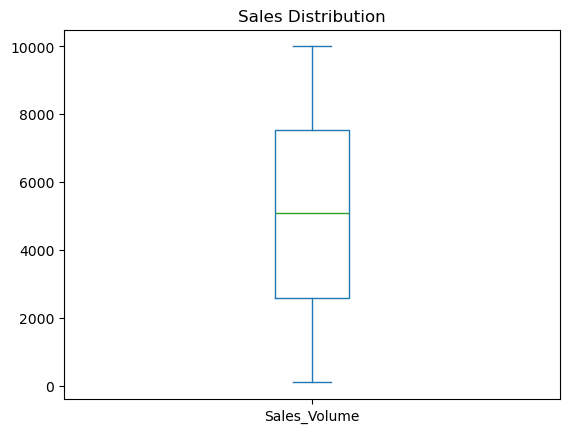

In [20]:

df['Sales_Volume'].plot(kind='box', title='Sales Distribution')
plt.show()


### Interpretation of the Boxplot

- **Median (~5000 units)**:  
  The green line inside the box shows the median sales volume is around **5,000 units**.

- **Interquartile Range (IQR)**:  
  - 25% of sales volumes are below ~2,500.  
  - 75% are below ~7,500.  
  - This means most BMW models/records sell between **2,500 and 7,500 units**.  

- **Spread of Data**:  
  - Minimum ~100 units.  
  - Maximum ~10,000 units.  
  - Wide range → sales vary significantly across models/regions/years.  

- **Symmetry**:  
  - The boxplot looks relatively balanced (median roughly in the center).  
  - Suggests sales distribution isn’t heavily skewed.  

- **Potential Outliers**:  
  - No extreme outliers beyond the whiskers (at least not shown here).  
  - That’s good — it means sales data is fairly consistent.  


### Key Insights

- BMW typically sells **a few thousand units per case/record** (not tiny numbers).  
- Some entries have **very low sales (~100)**, which might be niche models or underperforming regions.  
- Some reach **10,000 units**, which are the best-selling cases.  
- Overall → the data looks **clean and well-distributed**, no extreme distortions.  


---


## Feature Engineering

### Add Column Age_Car for know how old the car is

In [21]:
Current_Year=pd.Timestamp.now().year
df["Age_Car"]=Current_Year-df["Year"]

### Add Column Car Classification for divide cars to 3 Categories 

In [22]:
def classify(model):
    if model in ["5 Series", "7 Series", "3 Series"]:
        return "Series"
    elif model in ["I8", "I3", "M5", "M3"]:
        return "Sport"
    elif model in ["X5", "X6", "X3", "X1"]:
        return "SUV"
    else:
        return "Other"

df["Car_Classification"] = df["Model"].apply(classify)

### Add Column Period_of_Covid19 (2020-2021)

In [23]:
df["Period_of_Covid19"]=df["Year"].between(2020,2021).astype(int)

### Add Column Price per K/m

In [24]:
df["Price_per_KM"]=df["Price_USD"]/df["Mileage_KM"]

### Add column Revenue

In [25]:
df["Revenue"] = df['Sales_Volume'] * df['Price_USD']

---

### Show Sales_Volume Before -During-After Covid 19 (2 Years)

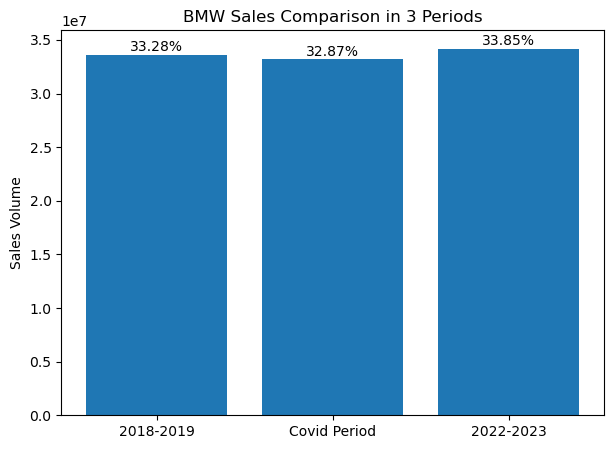

In [26]:
covid_sales = df.loc[df["Period_of_Covid19"] == 1, "Sales_Volume"].sum()
sales_Before = df.loc[df["Year"].isin([2018, 2019]), "Sales_Volume"].sum()
sales_After = df.loc[df["Year"].isin([2022, 2023]), "Sales_Volume"].sum()

labels = ["2018-2019", "Covid Period", "2022-2023"]
values = [sales_Before, covid_sales, sales_After]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, values)
total=sum(values)

for i, v in enumerate(values):
    plt.text(i, v + (v*0.01), f"{v/total*100:.2f}%", ha='center', fontsize=10)

plt.ylabel("Sales Volume")
plt.title("BMW Sales Comparison in 3 Periods")
plt.show()

---


# EDA & Key Patterns

##  Car Classification Sales by Region  

The table below shows the **total sales volume** of different car classifications (Sport, SUV, and Series) across major global regions. It also includes the aggregated **Total Sales** for each category.  

- **Car_Classification**: Type of vehicle (Sport, SUV, Series).  
- **Regions (Africa, Asia, Europe, Middle East, North America, South America)**: Sales distribution in each continent/region.  
- **Total_Sales**: Sum of sales across all regions for each car classification.  

This breakdown helps identify **which car types dominate in different regions** and provides insights into **global sales trends**.

In [27]:
pivot_df = (df.groupby(['Car_Classification', 'Region'])['Sales_Volume'].sum().unstack().reset_index())

pivot_df["Total_Sales"] = pivot_df.drop(columns=["Car_Classification"]).sum(axis=1)
pivot_df.columns.name = None
pivot_df.sort_values(by='Total_Sales', ascending=False).reset_index(drop=True)

,Car_Classification,Africa,Asia,Europe,Middle East,North America,South America,Total_Sales
0,Sport,14678917,15579129,15809022,15360811,15254842,15004401,91687122
1,SUV,15273567,15493214,15016262,15286813,15489474,14963994,91523324
2,Series,11612768,11901934,11729854,11678996,11658313,11583423,70165288


##  Insights: Dominant Car Types by Region  

- **Africa** → **SUVs** dominate with *15,273,567 sales*.  
- **Asia** → **Sport cars** dominate with *15,579,129 sales*.  
- **Europe** → **Sport cars** dominate with *15,809,022 sales*.  
- **Middle East** → **Sport cars** dominate with *15,360,811 sales*.  
- **North America** → **SUVs** dominate with *15,489,474 sales*.  
- **South America** → **Sport cars** dominate with *15,004,401 sales*.  
- **Globally** → **Sport cars** lead slightly with *91,687,122 total sales*.  

---

##  Conclusion:  
- **Sports cars** are the most dominant worldwide, especially in Asia, Europe, Middle East, and South America.  
- **SUVs** lead in **Africa and North America**.  
- **Series cars** consistently show lower sales across all regions.  


C:\Users\Amr\AppData\Local\Temp\ipykernel_17648\337902731.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


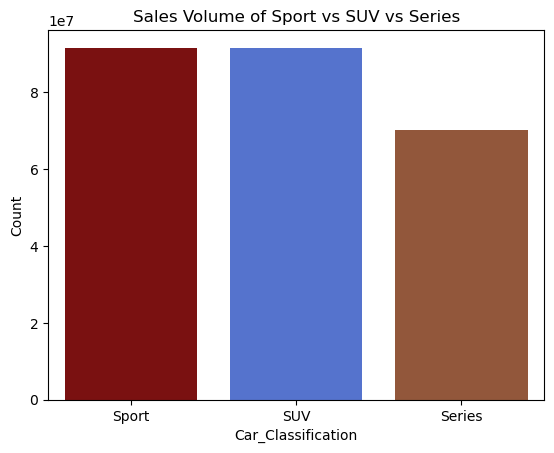

In [28]:
chart=df.groupby(['Car_Classification'])['Sales_Volume'].sum().reset_index(name='Total_sales_volume').sort_values(by='Total_sales_volume', ascending=False)

# Define custom colors for each Car_Classification
color_map = {
    "Sport": "darkred",
    "SUV": "royalblue",
    "Series": "sienna"
}



# Plot
sns.barplot(
    data=chart,
    x="Car_Classification",
    y="Total_sales_volume",
    palette=color_map
)

plt.title("Sales Volume of Sport vs SUV vs Series")
plt.ylabel("Count")
plt.show()

## Sales Trends by Car Classification

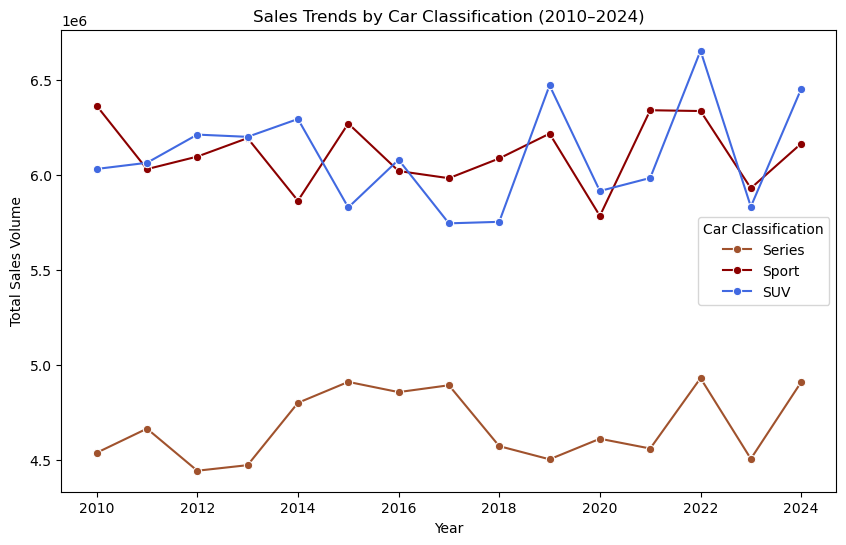

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="Sales_Volume", 
             hue="Car_Classification", estimator="sum", errorbar=None, marker="o",palette=color_map)
plt.title("Sales Trends by Car Classification (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.legend(title="Car Classification")
plt.show()

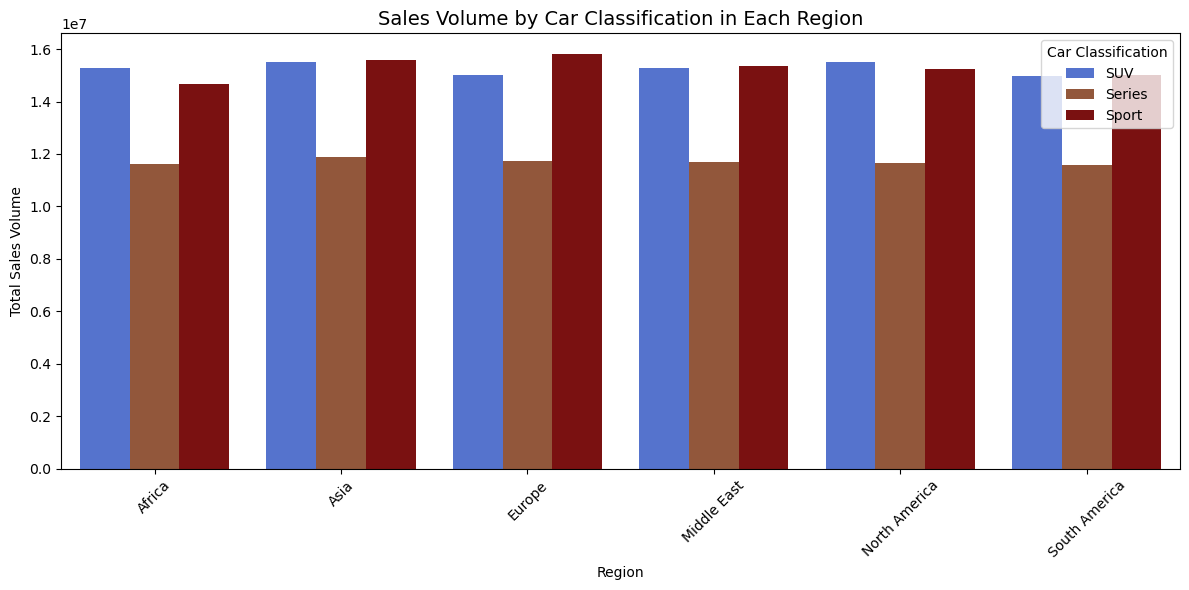

In [30]:
# Define custom colors for each Car_Classification
color_map = {
    "Sport": "darkred",
    "SUV": "royalblue",
    "Series": "sienna"
}

region_class_sales = df.groupby(['Region', 'Car_Classification'])['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_class_sales, x='Region', y='Sales_Volume', hue='Car_Classification',palette=color_map)

plt.title("Sales Volume by Car Classification in Each Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=45)
plt.legend(title="Car Classification")
plt.tight_layout()
plt.show()


## Car Sales by Transmission & Fuel Type  

The table below shows **total sales volume** based on different **transmission types** (Manual vs. Automatic) across four **fuel categories** (Diesel, Electric, Hybrid, Petrol). It also includes the overall **Total Sales** for each transmission type.  

- **Transmission**: Type of gearbox (Manual or Automatic).  
- **Fuel Types**: Diesel, Electric, Hybrid, and Petrol.  
- **Total_Sales**: Aggregated sales across all fuel types for each transmission.   


In [31]:
pivot_df = df.groupby(['Transmission', 'Fuel_Type'])['Sales_Volume'].sum().unstack(fill_value=0).reset_index()
pivot_df['Total_Sales']=pivot_df.drop(columns=["Transmission"]).sum(axis=1)
pivot_df.columns.name=None
pivot_df.sort_values(by='Total_Sales', ascending=False).reset_index(drop=True)


,Transmission,Diesel,Electric,Hybrid,Petrol,Total_Sales
0,Manual,31307405,31397155,32478720,32178797,127362077
1,Automatic,31054413,31760510,32053377,31145357,126013657


## Transmission shift over the years

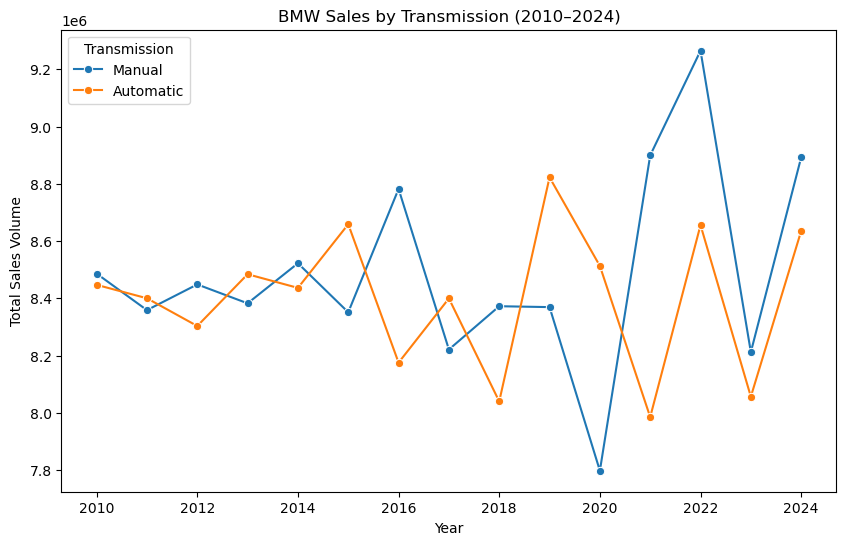

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="Sales_Volume", 
             hue="Transmission", estimator="sum", errorbar=None, marker="o")
plt.title("BMW Sales by Transmission (2010–2024)")
plt.ylabel("Total Sales Volume")
plt.xlabel("Year")
plt.show()

## Fuel Type transition over the years

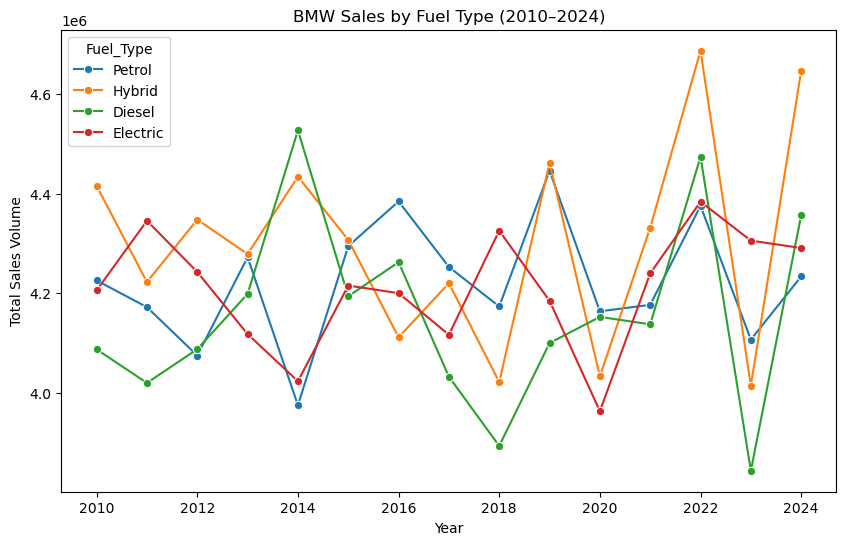

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="Sales_Volume", 
             hue="Fuel_Type", estimator="sum", errorbar=None, marker="o")
plt.title("BMW Sales by Fuel Type (2010–2024)")
plt.ylabel("Total Sales Volume")
plt.xlabel("Year")
plt.show()

##  Insights  

- **Overall Transmission Preference**:  
  - Manual cars slightly dominate with **127,362,077 sales**, compared to **126,013,657 sales** for Automatic.  

- **Fuel Type Trends**:  
  - **Manual** leads in **Hybrid (32.47M)** and **Petrol (32.17M)**.  
  - **Automatic** leads in **Electric (31.76M)** sales.  
  - **Diesel sales** are nearly equal between Manual (31.30M) and Automatic (31.05M).  

- **Sales by Transmission**:  
  - **Manual** Best sellers in 2022
  - **Automatic** Best sellers in 2019
- **Growing Rate**:
    ### Increasing:
  - ***Hybrid ->2022***
  - ***Petrol ->2019***
  - ***Disel ->2014***
  - ***Electric ->2022***
  ### Decreasing:
  - ***Hybrid ->2023***
  - ***Petrol ->2014***
  - ***Disel ->2023***
  - ***Electric ->2020***

- **Conclusion**:  
  - Manual cars still hold a **slight global advantage**, especially in Hybrid and Petrol categories.  
  - Automatic cars show strength in **Electric vehicles**, indicating a trend toward modern transmission in new technologies. 

## Best Selling Colors Per Region

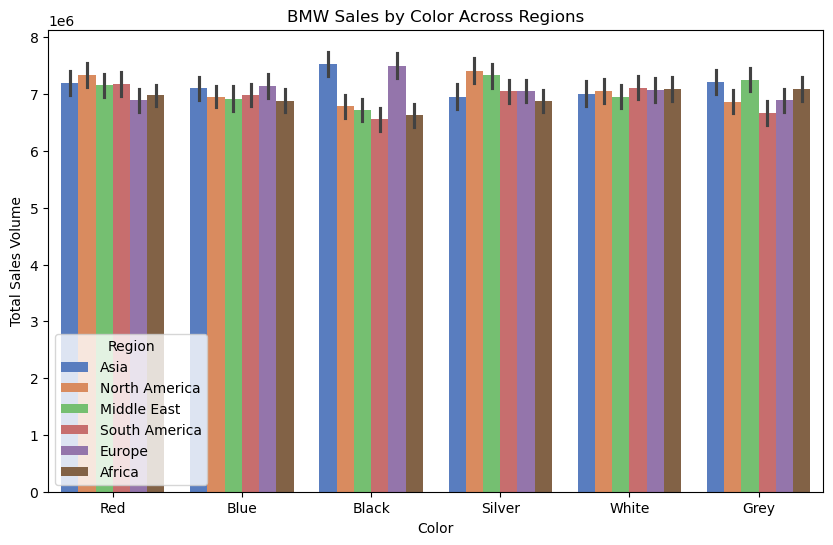

In [34]:
# BMW Sales by Color Across Regions
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Color", y="Sales_Volume", hue="Region", estimator=sum,palette="muted")
plt.title("BMW Sales by Color Across Regions")
plt.ylabel("Total Sales Volume")
plt.xlabel("Color")
plt.show()

###  Best Selling Colors Per Region
- ***Asia → Black***
- ***North America → Silver***
- ***Middle East → Grey***
- ***South America → Silver***
- ***Europe → Black***
- ***Africa → White***

##  Total Car Sales by Year (2010–2024)

The table below shows **annual total sales volume** of cars between 2010 and 2024.

In [35]:
df.groupby(['Year'])['Sales_Volume'].sum().reset_index(name='Total_Sales').sort_values(by='Total_Sales', ascending=False).reset_index(drop=True)

,Year,Total_Sales
0,2022,17920946
1,2024,17527854
2,2019,17191956
3,2015,17010207
4,2014,16958960
5,2016,16957550
6,2010,16933445
7,2021,16884666
8,2013,16866733
9,2011,16758941


##  Key Insights (Patterns)

- **Peak Sales:**  
  - The **highest sales** occurred in **2022** with **17.92M cars sold**.  

- **Lowest Sales:**  
  - The **lowest sales** occurred in **2023** with **16.26M cars sold**.  

- **Growth Periods:**  
  - Noticeable **growth from 2010 → 2015** (steady increase).  
  - Another big jump **2019 → 2022**, where sales peaked.  

- **Decline Periods:**  
  - A decline after **2015 → 2018** (dropping from 17.0M to 16.4M).  
  - A sharp fall in **2020** (likely due to COVID-19 impact).  
  - Big drop again in **2023** after the 2022 peak.  

---

##  Conclusion
- Sales show a **cyclical pattern** with ups and downs over the years.  
- **2020 drop** aligns with the global pandemic.  
- **2022 boom** suggests recovery, but **2023 decline** shows instability.  
- Overall, the market fluctuates around **16.2M – 17.9M** units annually.  


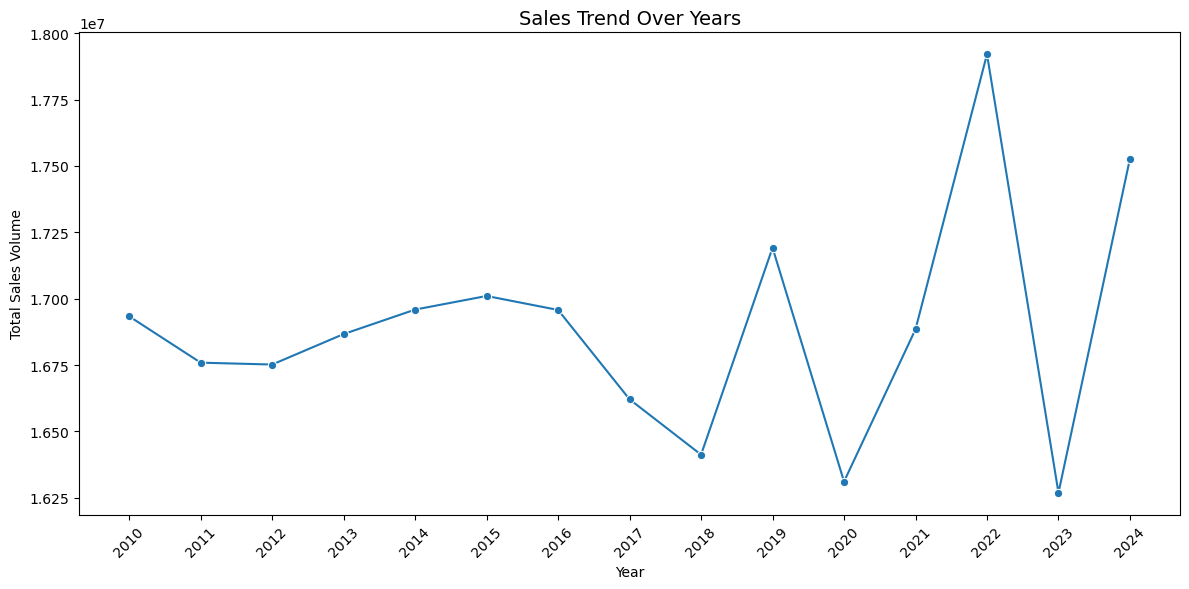

In [36]:
yearly_sales = df.groupby(['Year'])['Sales_Volume'].sum().reset_index(name='Total_Sales')
yearly_sales = yearly_sales.sort_values(by='Year')

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sales, x='Year', y='Total_Sales', marker='o')

plt.title("Sales Trend Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")

plt.xticks(yearly_sales['Year'], rotation=45)

plt.tight_layout()
plt.show()


In [37]:
df.groupby('Year')['Revenue'].sum().reset_index(name='Total_revenue').sort_values(by='Total_revenue', ascending=False).reset_index(drop=True)


,Year,Total_revenue
0,2022,1344427738820
1,2024,1312808115466
2,2019,1289342744664
3,2016,1284641854435
4,2021,1272402559079
5,2014,1269989867142
6,2010,1261631480830
7,2011,1258944308614
8,2013,1258599026870
9,2012,1257840248199


## Year-over-Year Growth
- **Yoy =Year-over-Year Growth** 
- **pct_change = (current sales_volume - pervious sales_volume )/pervious sales_volume** 

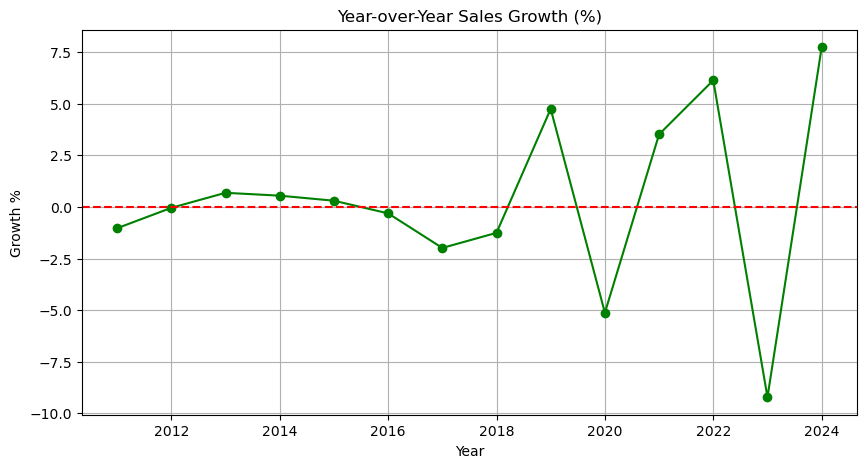

In [38]:
year_sales_volume=df.groupby("Year")["Sales_Volume"].sum().reset_index()
year_sales_volume["Yoy"]=year_sales_volume["Sales_Volume"].pct_change()*100

# plot 

plt.figure(figsize=(10,5))
plt.plot(year_sales_volume['Year'], year_sales_volume['Yoy'], marker='o', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Year-over-Year Sales Growth (%)")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.grid(True)
plt.show()

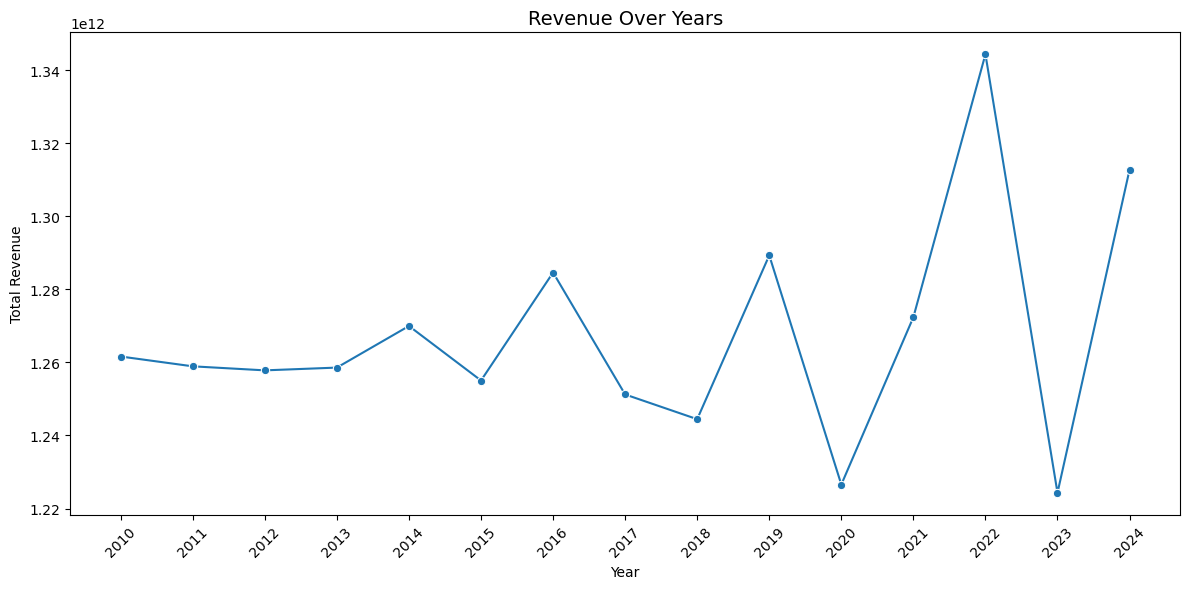

In [39]:
yearly_sales = df.groupby('Year')['Revenue'].sum().reset_index(name='Total_revenue')
yearly_sales = yearly_sales.sort_values(by='Year')

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sales, x='Year', y='Total_revenue', marker='o')

plt.title("Revenue Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Revenue")

plt.xticks(yearly_sales['Year'], rotation=45)

plt.tight_layout()
plt.show()

##  Highest Revenue Car Models by Year

The following table shows the **top car model with the highest revenue** in each year:


In [40]:
t1 = df.groupby(['Year', 'Model'])['Revenue'].max().reset_index(name='Car_revenue').sort_values(by=['Year', 'Car_revenue'], ascending=False)
t1 = t1.groupby('Year').head(1).reset_index(drop=True)
t1

,Year,Model,Car_revenue
0,2024,X1,1187322879
1,2023,X1,1182092750
2,2022,3 Series,1173580012
3,2021,M5,1189951021
4,2020,X1,1185054304
5,2019,X1,1174237176
6,2018,X3,1175877783
7,2017,3 Series,1162408505
8,2016,X5,1169774181
9,2015,5 Series,1175304196


##  Insights from Highest Revenue Car Models (2010–2024)

### 1. Consistent Leaders
- **BMW X1** dominates multiple years (**2014, 2019, 2020, 2023, and 2024**), confirming its strong market performance and customer appeal.
- **BMW M5** reached the top in **2011 and 2021**, showing that high-performance models can still achieve exceptional revenue.
- Other recurring leaders include the **3 Series, 5 Series, and X3**, which highlight the brand’s diverse revenue sources.

### 2. Strong Brand Balance
- BMW shows strength across different categories — compact, luxury, and performance — instead of relying on one type of vehicle.
- The presence of multiple models over time indicates that no single car dominates all years, but several models contribute to overall success.

### 3. Revenue Range and Stability
- Top model revenues each year fall within a **narrow band of ~1.14B to 1.19B USD**.
- This suggests stable sales performance, with BMW achieving consistent leadership across 15 years.

### 4. Shifts in Model Popularity
- Leadership changes over time: some years are led by **core mainstream models (X1, 3 Series)**, while others are led by **flagship or performance models (M5, M3)**.
- These shifts show BMW’s ability to adapt to market demand while maintaining high revenue across different segments.

---

##  Conclusion
The analysis highlights **BMW X1** as the most consistently successful model, driving top revenues across several years.  
However, the presence of models like the **M5, 3 Series, 5 Series, and X3** demonstrates BMW’s balanced portfolio and ability to generate high revenues from multiple segments.  
Overall, BMW’s strategy of **diversification across performance, luxury, and mainstream models** ensured long-term revenue stability and leadership from 2010 to 2024.


##  Highest Sales Volume Car Models by Year

The following table shows the **top car model with the highest Sales Volume** in each year:


In [41]:
t1 = df.groupby(['Year', 'Model'])['Sales_Volume'].max().reset_index(name='Car_Sales_Volume').sort_values(by=['Year', 'Car_Sales_Volume'], ascending=False)
t1 = t1.groupby('Year').head(1).reset_index(drop=True)
t1

,Year,Model,Car_Sales_Volume
0,2024,5 Series,9999
1,2023,I8,9996
2,2022,M3,9999
3,2021,3 Series,9992
4,2020,X6,9990
5,2019,M5,9998
6,2018,I3,9996
7,2017,3 Series,9999
8,2016,X6,9995
9,2015,X3,9994


##  Insights from Highest Sales Volume Car Models (2010–2024)

### 1. Consistent Top Performers
- **BMW 3 Series** and **BMW M3** reached the maximum sales volume of **9,999 units**, showing their enduring popularity.
- **BMW X3** and **BMW X5** also achieved **9,999 and 9,998 units**, highlighting their strength in multiple years.
- **BMW I8** appears in both **2010 and 2023**, showing long-lasting appeal for BMW’s performance/electric design.

### 2. Strong Model Diversity
- The leadership changes across many different models: **sedans (3 Series, 5 Series, M3, M5)**, **SUVs (X1, X3, X5, X6)**, and **electric models (I3, I8)**.
- This reflects BMW’s ability to spread success across multiple product lines rather than relying on a single flagship.

### 3. Sales Volume Stability
- Most top models recorded values very close to **10,000 units**, indicating a stable sales benchmark.
- The narrow range (9,990–9,999) suggests consistent demand with little variation in maximum annual performance.

### 4. Shifts Across Years
- **2010–2014**: Mix of performance (I8, M models) and SUVs (X5).  
- **2015–2019**: Balanced mix of SUVs and high-performance models like the **M5**.  
- **2020–2024**: Sales leaders are more evenly spread across body types, showing BMW’s strength in multiple segments.

---

##  Conclusion
From 2010 to 2024, BMW maintained **remarkable consistency in sales volumes**, with most top models reaching nearly the same benchmark.  
The data highlights BMW’s **diversified success**: sedans, SUVs, and electric cars all achieved peak sales in different years.  
Overall, BMW’s strategy of **balancing traditional, performance, and electric models** ensured stable market leadership and adaptability across 15 years.


---

In [42]:
df.corr(numeric_only=True)

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Age_Car,Period_of_Covid19,Price_per_KM,Revenue
Year,1.000000,-0.001944,0.008741,0.003547,0.001671,-1.000000,0.314718,-0.007198,0.004198
Engine_Size_L,-0.001944,1.000000,-0.004906,0.000146,-0.003942,0.001944,0.006808,-0.002085,-0.002094
Mileage_KM,0.008741,-0.004906,1.000000,-0.004238,0.001434,-0.008741,0.001543,-0.040081,-0.000398
Price_USD,0.003547,0.000146,-0.004238,1.000000,0.000080,-0.003547,0.002967,0.010417,0.503798
Sales_Volume,0.001671,-0.003942,0.001434,0.000080,1.000000,-0.001671,-0.002766,-0.000538,0.816078
Age_Car,-1.000000,0.001944,-0.008741,-0.003547,-0.001671,1.000000,-0.314718,0.007198,-0.004198
Period_of_Covid19,0.314718,0.006808,0.001543,0.002967,-0.002766,-0.314718,1.000000,-0.001932,-0.000432
Price_per_KM,-0.007198,-0.002085,-0.040081,0.010417,-0.000538,0.007198,-0.001932,1.000000,0.004670
Revenue,0.004198,-0.002094,-0.000398,0.503798,0.816078,-0.004198,-0.000432,0.004670,1.000000


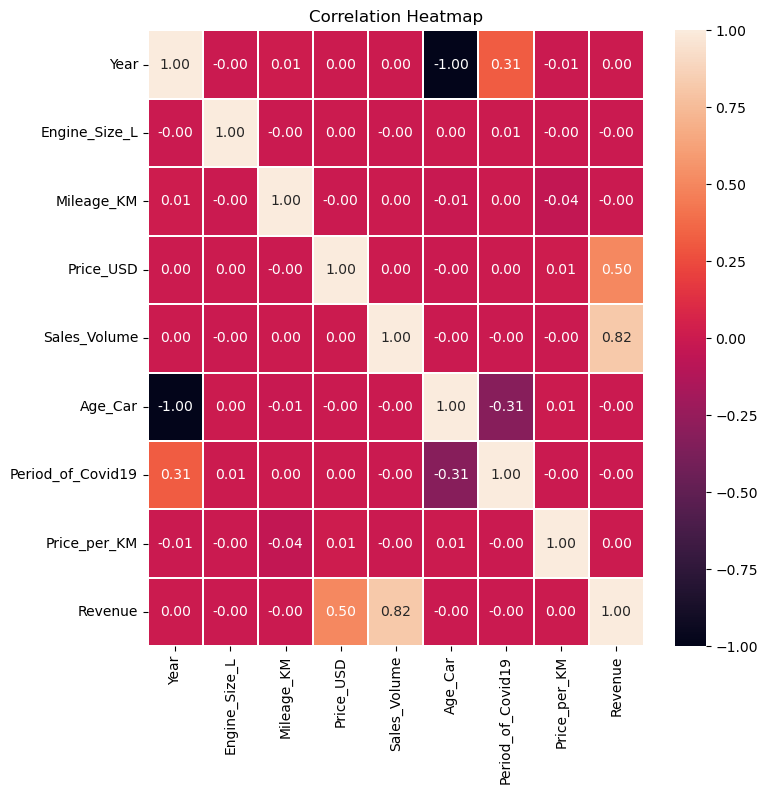

In [43]:
from sklearn.preprocessing import LabelEncoder

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), linewidths=0.01, annot=True, fmt='0.2f')
plt.title('Correlation Heatmap')
plt.show()

---

## Check Outliers Again

In [44]:
num_cols=df.select_dtypes(include=["int64","float64"])
for i,col in enumerate(num_cols):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[col][(df[col]<lower_bound) | (df[col]>upper_bound)]
    print(f"{i+1}: {col} - {len(outliers)}")

1: Year - 0
2: Engine_Size_L - 0
3: Mileage_KM - 0
4: Price_USD - 0
5: Sales_Volume - 0
6: Age_Car - 0
7: Price_per_KM - 6222
8: Revenue - 167


### Show Distribution of Revenue-Price_per_KM

Text(0.5, 0, 'Revenue')

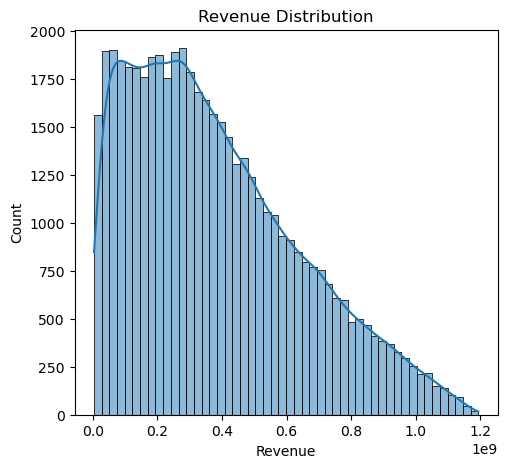

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["Revenue"], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")

Text(0.5, 0, 'Price_per_KM')

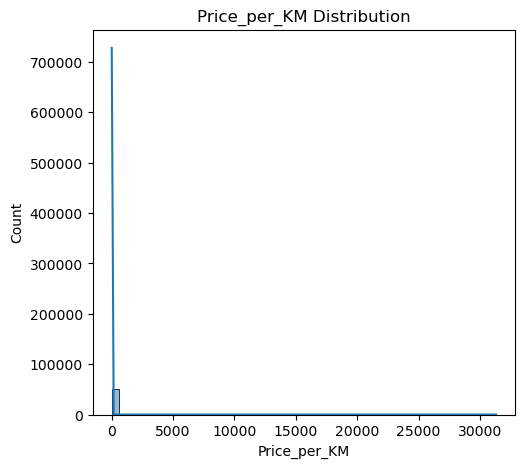

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["Price_per_KM"], bins=50, kde=True)
plt.title("Price_per_KM Distribution")
plt.xlabel("Price_per_KM")

## Handling Outliers in Revenue

In [47]:
# Make a copy to keep original safe
df_encoded = df.copy()
df_encoded["Revenue"]=np.log1p(df["Revenue"])

Text(0.5, 0, 'Revenue')

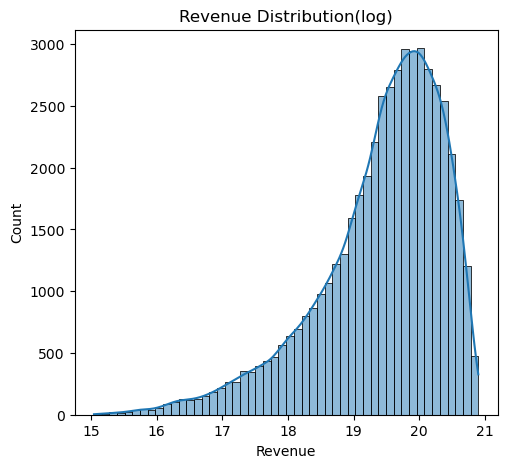

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_encoded["Revenue"], bins=50, kde=True)
plt.title("Revenue Distribution(log)")
plt.xlabel("Revenue")

## Handling outliers in Price_per_KM

In [49]:
df_encoded["Price_per_KM"]=np.log1p(df["Price_per_KM"])

Text(0.5, 0, 'Price_per_KM')

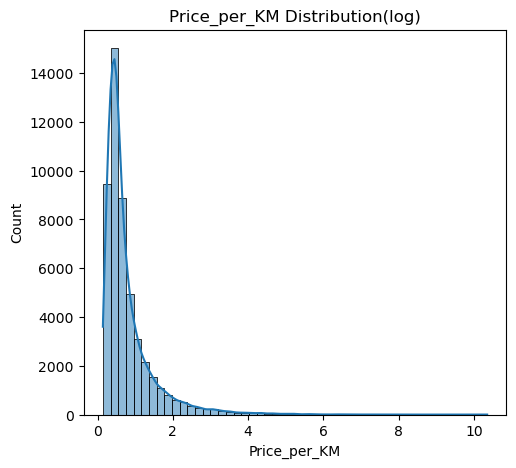

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_encoded["Price_per_KM"], bins=50, kde=True)
plt.title("Price_per_KM Distribution(log)")
plt.xlabel("Price_per_KM")

## Encoding


In [51]:
# Detect categorical columns (dtype == object or low unique count in int)
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Categorical Columns and their unique counts:\n")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Columns and their unique counts:

Model: 11 unique values
Region: 6 unique values
Color: 6 unique values
Fuel_Type: 4 unique values
Transmission: 2 unique values
Sales_Classification: 2 unique values
Car_Classification: 3 unique values


Encoding Categorical Variables (Hybrid Strategy)

The dataset contains several categorical features with different levels of cardinality. To prepare them for modeling, we apply a hybrid encoding strategy:


Region, Color, Fuel_Type, Car_Classification, Model → Encoded with One-Hot Encoding using pandas get_dummies. This avoids introducing false order among categories, and drop_first=True prevents multicollinearity.

Transmission (2 values) → Encoded as a binary variable (Manual=0, Automatic=1).

Sales_Classification (target, 2 values) → Encoded as a binary variable (Low=0, High=1).

This hybrid approach balances dimensionality reduction (by label encoding Model) with interpretability and correctness (by one-hot encoding small-cardinality features).

In [52]:
pd.set_option("display.max_columns", None)


# Binary Encoding
# Transmission: Manual=0, Automatic=1
df_encoded["Transmission"] = df_encoded["Transmission"].map({"Manual": 0, "Automatic": 1})

# Sales_Classification: Low=0, High=1
df_encoded["Sales_Classification"] = df_encoded["Sales_Classification"].map({"Low": 0, "High": 1})

# One-Hot Encoding for selected columns
one_hot_cols = ["Model","Region", "Color", "Fuel_Type", "Car_Classification"]
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True, dtype=int)

# Final check
print("Shape after encoding:", df_encoded.shape)
print(df_encoded.head())

Shape after encoding: (50000, 36)
   Year  Transmission  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
0  2016             0            3.5      151748      98740          8300   
1  2013             1            1.6      121671      79219          3428   
2  2022             1            4.5       10991     113265          6994   
3  2024             1            1.7       27255      60971          4047   
4  2020             0            2.1      122131      49898          3080   

   Sales_Classification  Age_Car  Period_of_Covid19  Price_per_KM    Revenue  \
0                     1        9                  0      0.501190  20.524256   
1                     0       12                  0      0.501437  19.419704   
2                     0        3                  0      2.425267  20.490293   
3                     0        1                  0      1.174665  19.323885   
4                     0        5                  1      0.342569  18.850421   

   Model_5 Series  Mod

In [53]:
# Get numeric columns
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Exclude binary/encoded columns (all values are 0/1)
num_cols = [col for col in num_cols if df_encoded[col].nunique() > 2]

# Standardize only the continuous numeric columns
for col in num_cols:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    df_encoded[col] = (df_encoded[col] - mean) / std

# Final check
print("Shape after Standerization:", df_encoded.shape)
print(df_encoded.head())

Shape after Standerization: (50000, 36)
       Year  Transmission  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
0 -0.234873             0       0.250545    0.887806   0.911808      1.131519   
1 -0.928602             1      -1.632361    0.368713   0.160949     -0.573906   
2  1.152583             1       1.241549   -1.541489   1.470499      0.674359   
3  1.615069             1      -1.533260   -1.260792  -0.540944     -0.357227   
4  0.690098             0      -1.136859    0.376652  -0.966857     -0.695722   

   Sales_Classification   Age_Car  Period_of_Covid19  Price_per_KM   Revenue  \
0                     1  0.234873                  0     -0.413841  1.147216   
1                     0  0.928602                  0     -0.413486  0.000846   
2                     0 -1.152583                  0      2.354976  1.111968   
3                     0 -1.615069                  0      0.555313 -0.098601   
4                     0 -0.690098                  1     -0.642103 -0.589

In [54]:
df_encoded.corr()

,Year,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Age_Car,Period_of_Covid19,Price_per_KM,Revenue,Model_5 Series,Model_7 Series,Model_I3,Model_I8,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Region_Asia,Region_Europe,Region_Middle East,Region_North America,Region_South America,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Car_Classification_Series,Car_Classification_Sport
Year,1.000000,-0.005116,-0.001944,0.008741,0.003547,0.001671,0.005391,-1.000000,0.314718,-0.007459,0.001654,0.000207,0.005020,-0.004992,-0.005634,0.001544,0.001631,-0.007186,0.000879,-0.003324,0.012596,-0.006820,0.007125,0.006559,0.001565,-0.003857,0.005968,-0.005495,-0.002995,-0.001551,-0.001347,-0.000693,0.001618,-0.000651,0.003002,-0.004517
Transmission,-0.005116,1.000000,-0.001357,0.013476,0.005230,0.001487,0.001647,0.005116,0.000326,-0.009537,0.003684,0.002928,0.002801,-0.003837,0.002101,0.001705,-0.005072,0.003203,-0.002747,0.003824,-0.006193,0.006087,-0.002611,-0.001683,0.003238,-0.007229,0.000910,-0.000460,-0.007833,-0.002604,0.008016,0.005354,-0.000077,-0.002800,0.004484,-0.003055
Engine_Size_L,-0.001944,-0.001357,1.000000,-0.004906,0.000146,-0.003942,-0.001796,0.001944,0.006808,0.006972,-0.004506,-0.001307,0.003622,0.004903,-0.002009,0.001781,0.000863,-0.004767,-0.003940,-0.002316,0.001328,-0.006978,-0.003983,0.003990,0.001146,0.001058,-0.008245,-0.001061,0.010667,0.002883,-0.000031,-0.006509,0.002033,0.004210,0.002667,0.003308
Mileage_KM,0.008741,0.013476,-0.004906,1.000000,-0.004238,0.001434,0.006580,-0.008741,0.001543,-0.720460,-0.003824,0.005760,0.002685,-0.008657,-0.004727,-0.003101,0.011020,0.000375,0.002223,-0.000257,-0.004465,-0.002610,0.002638,-0.003025,0.004415,-0.002322,0.000455,-0.002292,0.002248,0.000646,-0.007244,0.002160,-0.002454,-0.005532,0.004940,-0.003342
Price_USD,0.003547,0.005230,0.000146,-0.004238,1.000000,0.000080,-0.001727,-0.003547,0.002967,0.246813,0.391040,0.003098,0.006609,-0.002875,0.004064,-0.002310,-0.006752,0.002777,-0.000217,-0.003943,-0.007238,0.009028,-0.000796,-0.005310,0.000610,-0.001043,0.006720,-0.007452,-0.002399,-0.002420,0.006454,0.005360,-0.005325,-0.000984,0.010494,-0.004661
Sales_Volume,0.001671,0.001487,-0.003942,0.001434,0.000080,1.000000,0.795238,-0.001671,-0.002766,-0.000833,0.832095,-0.004182,0.003404,-0.006479,0.002007,-0.000327,0.002142,0.006013,-0.001054,-0.000691,-0.000744,0.002494,0.006058,-0.001944,0.003097,-0.004908,0.001978,-0.005791,-0.002543,0.006763,0.003618,-0.000636,0.001504,-0.004411,-0.000547,-0.001615
Sales_Classification,0.005391,0.001647,-0.001796,0.006580,-0.001727,0.795238,1.000000,-0.005391,-0.003144,-0.007456,0.535786,-0.000480,0.002127,-0.006770,0.002785,0.002663,-0.001587,-0.000525,0.001029,0.001493,-0.001435,0.004660,0.007903,-0.005363,0.000757,-0.002445,0.003948,-0.005996,-0.006203,0.006397,0.005013,-0.000869,0.000163,-0.001177,0.001548,-0.001774
Age_Car,-1.000000,0.005116,0.001944,-0.008741,-0.003547,-0.001671,-0.005391,1.000000,-0.314718,0.007459,-0.001654,-0.000207,-0.005020,0.004992,0.005634,-0.001544,-0.001631,0.007186,-0.000879,0.003324,-0.012596,0.006820,-0.007125,-0.006559,-0.001565,0.003857,-0.005968,0.005495,0.002995,0.001551,0.001347,0.000693,-0.001618,0.000651,-0.003002,0.004517
Period_of_Covid19,0.314718,0.000326,0.006808,0.001543,0.002967,-0.002766,-0.003144,-0.314718,1.000000,-0.001580,0.001226,-0.000416,0.003099,0.000725,-0.005089,0.002819,0.005795,-0.000644,-0.004454,-0.005429,0.000821,-0.013267,0.004723,0.010716,-0.003872,-0.002604,-0.003311,-0.004141,-0.007136,-0.001168,0.008378,-0.001017,-0.002944,-0.001751,0.003540,0.002481
Price_per_KM,-0.007459,-0.009537,0.006972,-0.720460,0.246813,-0.000833,-0.007456,0.007459,-0.001580,1.000000,0.098548,-0.005278,0.000280,0.009823,0.007396,-0.003142,-0.008091,-0.000900,-0.001363,0.002679,-0.002770,0.002729,-0.003332,0.000474,-0.005136,0.005682,-0.001027,-0.000723,-0.005391,-0.003410,0.013561,0.004554,-0.00773

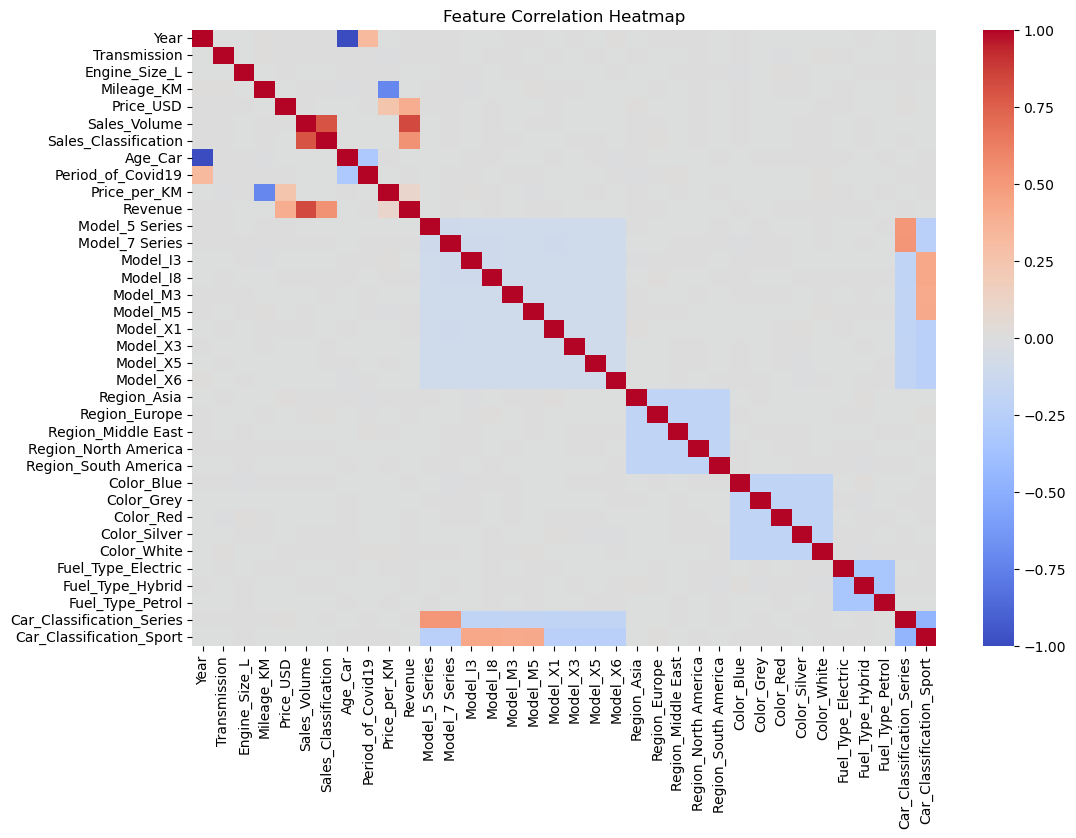

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()